# Đồ án cuối kì: Lập trình cho khoa học dữ liệu

## Thông tin nhóm:
|MSSV| Họ tên|
|---|---|
|18120507|Trương Công Phu|
|18120532|Nguyễn Hoàng Sang|
|18120626| Đặng Quang Trường|


## Import library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Check python enviroment

In [2]:
!which python

/home/truong/Downloads/python/envs/p4ds-env/bin/python


## Thu thập dữ liệu:

Dữ liệu được tải từ [kaggle](https://www.kaggle.com/karnikakapoor/sex-offender-registry). Dữ liệu này là dữ liệu về tội phạm tình dục( sex offender) được cung cấp bởi Dịch vụ Tòa án và Cơ quan Giám sát Vi phạm Washington DC.

**Về dữ liệu:** " Sex Offender work and home locations, created as part of the DC Geographic Information System (DC GIS) for the D.C. Office of the Chief Technology Officer (OCTO) and participating D.C. government agencies. If users want to obtain more information about sex offenders, they should go to the Sex Offender Mapping Application ([here](https://sexoffender.dc.gov/)) and download the “More Details” PDF. A database provided by the Court Services and Offender Supervision Agency identified sex offender registry providing location at the block level. https://www.csosa.gov/. "

The Sex Offender Registry database provides information on Class A and Class B sex offenders only. If you would like to see a complete list of all Class A, B, and C Offenders, you must go, in person, to one of the MPDC Registry Book locations. For a complete listing of locations, click [here](https://sexoffender.dc.gov/).

## Tiền xử lí và khám phá dữ liệu:

### Read data

In [3]:
data = pd.read_csv('Data/Sex_Offender_Registry.csv')
data.head(5)

,X,Y,OBJECTID,BLOCK_X,BLOCK_Y,DCS_LAST_MOD_DTM,SEXOFFENDERCODE,ADDDATE,LASTNAME,FIRSTNAME,ALIASES,MAXCLASSIFICATION,BIRTHDATE,HEIGHTNUM,WEIGHTNUM,EYECOLOR,HAIRCOLOR,MARKINGS,REGISTRATIONDATE,TYPE,DISTRICT,PSA,BLOCKNAME,QUADRANT,ZIP
0,-76.973974,38.863542,4236689,402259,132858,2021/01/14 06:15:24+00,002-910,2016/08/02 09:34:44+00,SANDERS,ANTHONY,DERRICK JUICE / X JUICE / ANTHONY SANDERS /...,A,1969/06/19 00:00:00+00,66,138,BROWN,BLACK,TATTOO-LEFT WRIST: CHINESE SYMBOL; RIGHT WRIST...,2016/08/29 00:00:00+00,HOME,6.0,607.0,2300 - 2399 BLOCK OF GOOD HOPE ROAD SE,SE,20020
1,-76.972648,38.857499,4236690,402374,132187,2021/01/14 06:15:24+00,002-913,2016/08/04 14:42:53+00,GAYLES,JERMAINE,ROBERT GAYLES / JERMAINE IRVIN / JERMAINE I...,B,1986/06/25 00:00:00+00,73,200,BROWN,BLACK,NaN,2018/02/22 00:00:00+00,HOME,7.0,701.0,2300 - 2399 BLOCK OF AINGER PLACE SE,SE,20020
2,-76.971451,38.932130,4236691,402476,140472,2021/01/14 06:15:24+00,002-919,2016/08/09 18:06:15+00,HARRIS,REGINALD,REGINALD ELBERT HARRIS-WILLS,B,1995/02/12 00:00:00+00,67,157,BROWN,BLACK,"TATTOO ON LOWER RIGHT ARM ""LAMONT""; TATTOO ON ...",2016/10/20 00:00:00+00,HOME,5.0,503.0,2400 - 2499 BLOCK OF LAWRENCE STREET NE,NE,20018
3,-77.010605,38.914089,4236692,399080,138468,2021/01/14 06:15:24+00,002-927,2016/08/30 11:29:37+00,STRICKLAND,GARY,MELVIN,B,1967/01/22 00:00:00+00,74,245,BROWN,BLACK,"TATTOO ON SHOULDER ""TINA""; GUNSHOT WOUNDS ON B...",2016/09/01 00:00:00+00,HOME,3.0,308.0,1 - 99 BLOCK OF S STREET NW,NW,20001
4,-77.021917,38.913356,4236693,398099,138387,2021/01/14 06:15:24+00,002-928,2016/08/31 10:07:09+00,GANT,TIMOTHY,TIMOTHY GANT,B,1989/09/19 00:00:00+00,71,285,BROWN,BLACK,TATTOO ON LEFT SHOULDER 'PICTURE OF A CROSS WI...,2017/02/09 00:00:00+00,WORK,3.0,308.0,1700 - 1799 BLOCK OF 7TH STREET NW,NW,20001


### Số lượng dòng cột:

In [4]:
n_rows, n_cols = data.shape
print('shape: ',n_rows, n_cols)

shape:  1323 25


### Kiểm tra dữ liệu có bị trùng lắp không?

In [5]:
data.duplicated().sum()

0

Nhìn qua dữ liệu, ta thấy `OBJECTID` là các giá trị độc lập, mỗi người sẽ có một OBJECTID khác nhau. Giả sử bỏ thuộc tính này đi, để kiểm tra xem dữ liệu có bị lặp hay không?

In [6]:
data_copy = data.drop(['OBJECTID'], axis = 1)
data_copy.duplicated().sum()

2

Có hai giá trị bị lặp trong dữ liệu. Cùng xem các dòng này.

In [7]:
data[data_copy.duplicated(keep = False)]

,X,Y,OBJECTID,BLOCK_X,BLOCK_Y,DCS_LAST_MOD_DTM,SEXOFFENDERCODE,ADDDATE,LASTNAME,FIRSTNAME,ALIASES,MAXCLASSIFICATION,BIRTHDATE,HEIGHTNUM,WEIGHTNUM,EYECOLOR,HAIRCOLOR,MARKINGS,REGISTRATIONDATE,TYPE,DISTRICT,PSA,BLOCKNAME,QUADRANT,ZIP
129,-76.965307,38.858277,4236744,403011,132273,2021/01/14 06:15:24+00,003-066,2017/02/16 09:51:24+00,FULLARD,DONNELL,DONNELL NMN FULLARD / POLO FULLARD / XX FULL...,B,1973/01/13 00:00:00+00,69,210,BLACK,BROWN,NaN,2017/03/06 00:00:00+00,WORK,6.0,606.0,2600 - 2699 BLOCK OF 29TH STREET SE,SE,20020
131,-76.965307,38.858277,4236746,403011,132273,2021/01/14 06:15:24+00,003-066,2017/02/16 09:51:24+00,FULLARD,DONNELL,DONNELL NMN FULLARD / POLO FULLARD / XX FULL...,B,1973/01/13 00:00:00+00,69,210,BLACK,BROWN,NaN,2017/03/06 00:00:00+00,WORK,6.0,606.0,2600 - 2699 BLOCK OF 29TH STREET SE,SE,20020
532,-76.981211,38.938313,4237006,401629,141158,2021/01/14 06:15:24+00,002-305,2013/12/24 13:28:11+00,FEATHERSTONE,GUY,ROCK FEATHERST0NE / GUN FEATHERSTONE / GUY ...,B,1958/03/15 00:00:00+00,66,130,BROWN,BLACK,NaN,2013/12/26 00:00:00+00,HOME,5.0,504.0,1700 - 1719 BLOCK OF RANDOLPH STREET NE,NE,20018
533,-76.981211,38.938313,4237007,401629,141158,2021/01/14 06:15:24+00,002-305,2013/12/24 13:28:11+00,FEATHERSTONE,GUY,ROCK FEATHERST0NE / GUN FEATHERSTONE / GUY ...,B,1958/03/15 00:00:00+00,66,130,BROWN,BLACK,NaN,2013/12/26 00:00:00+00,HOME,5.0,504.0,1700 - 1719 BLOCK OF RANDOLPH STREET NE,NE,20018


In [8]:
# Xóa các dòng bị lặp.
data = data.drop_duplicates()

### Data description: Ý nghĩa của mỗi cột dữ liệu.

In [9]:
f = open('data_description.txt', 'r')
print(f.read())

- X,Y : component of shapefile.
- OBJECTID: unique ID of offender.
- BLOCK_X, BLOCK_Y:
- DCS_LAST_MOD_DTM: date of last update on offender.
- SEXOFFENDERCODE: code.
- ADDDATE: date.
- LASTNAME: surname.
- FIRSTNAME: name.
- ALIASES: nick names.
- MAXCLASSIFICATION: classification of offender.
    + Class A: Class A Sex Offenders have been convicted of, or found not guilty by reason of insanity of the following sex offenses:
        + First degree sexual abuse
        + Second degree sexual abuse
        + Forcible rape
        + First degree child sexual abuse of a child under 12 years of age
        + Carnal knowledge of a child under 12 years of age
        + Murder or manslaughter committed before, during or after engaging or attempting to engage in a sexual act, sexual contact or rape
        + Forcible sodomy
        + Sodomy committed against a child under 12
        + Assault with the intent to commit any of the aforementioned act
        + Attempting to commit any of the aforem

### Ý nghĩa của mỗi dòng dữ liệu.

Mỗi dòng dữ liệu chứa thông tin của một tội phạm bao gồm:
- Họ, tên, nick name.
- Thời gian gần nhất cập nhật về tội phạm.
- Loại tội phạm.
- Ngày sinh, giới tính.
- Chiều cao, cân nặng, màu tóc, màu mắt, đặc điểm nhận dạng.
- Nơi gây án.
- Cơ quan cảnh sát trực thuộc quản lý địa phương.

### Các thuộc tính bị thiếu.

In [10]:
missing_cols = data.columns[data.isna().sum()>0]
print(missing_cols)

Index(['ALIASES', 'MARKINGS', 'DISTRICT', 'PSA'], dtype='object')


In [11]:
# missing counts
data[missing_cols].isna().sum()

ALIASES     536
MARKINGS    915
DISTRICT      4
PSA           5
dtype: int64

In [12]:
# missing ratio
(data[missing_cols].isna().sum() / n_rows)*100

ALIASES     40.513983
MARKINGS    69.160998
DISTRICT     0.302343
PSA          0.377929
dtype: float64

### Cùng quan sát các kiểu dữ liệu của data.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1322
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  1323 non-null   float64
 1   Y                  1323 non-null   float64
 2   OBJECTID           1323 non-null   int64  
 3   BLOCK_X            1323 non-null   int64  
 4   BLOCK_Y            1323 non-null   int64  
 5   DCS_LAST_MOD_DTM   1323 non-null   object 
 6   SEXOFFENDERCODE    1323 non-null   object 
 7   ADDDATE            1323 non-null   object 
 8   LASTNAME           1323 non-null   object 
 9   FIRSTNAME          1323 non-null   object 
 10  ALIASES            787 non-null    object 
 11  MAXCLASSIFICATION  1323 non-null   object 
 12  BIRTHDATE          1323 non-null   object 
 13  HEIGHTNUM          1323 non-null   int64  
 14  WEIGHTNUM          1323 non-null   int64  
 15  EYECOLOR           1323 non-null   object 
 16  HAIRCOLOR          1323 

- Dữ liệu bao gồm các kiểu dữ liệu như sau: `float64`, `int64`, `object`. Nhưng khi quan sát dữ liệu và đọc file description có một vài thuộc tính chỉ thời gian nhưng lại được phân loại vào `object`. Do đó cần phải chuyển đổi kiểu dữ liệu của các thuộc tính đó sang `datetime`. Cụ thể các thuộc tính đó bao gồm: `DCS_LAST_MOD_DTM`, `ADDDATE`,`BIRTHDAY`,`REGISTRATIONDATE`.

In [14]:
datetime_cols = ['DCS_LAST_MOD_DTM', 'ADDDATE','BIRTHDATE','REGISTRATIONDATE']
data[datetime_cols] = data[datetime_cols].apply(pd.to_datetime, format = '%Y/%m/%d %H:%M:%S')

### Quan sát các gía trị thuộc tính datetime

In [15]:
def missing_ratio(s):
    return s.isna().mean()*100

def diff_vals(s):
    return s.unique()

def num_diff_vals(s):
    if missing_ratio(s) > 0:
        num = len(diff_vals(s)) -1
    else:
        num = len(diff_vals(s))
    return num

data[datetime_cols].agg([min, max,diff_vals,num_diff_vals,missing_ratio]).transpose()

,min,max,diff_vals,num_diff_vals,missing_ratio
DCS_LAST_MOD_DTM,2021-01-14 06:15:24+00:00,2021-01-14 06:15:24+00:00,[2021-01-14 06:15:24+00:00],1,0.0
ADDDATE,2001-03-12 10:28:36+00:00,2020-12-10 12:51:08+00:00,"[2016-08-02 09:34:44+00:00, 2016-08-04 14:42:5...",769,0.0
BIRTHDATE,1925-07-03 00:00:00+00:00,2000-05-13 00:00:00+00:00,"[1969-06-19 00:00:00+00:00, 1986-06-25 00:00:0...",1022,0.0
REGISTRATIONDATE,1999-09-22 00:00:00+00:00,2020-12-29 00:00:00+00:00,"[2016-08-29 00:00:00+00:00, 2018-02-22 00:00:0...",897,0.0


`DCS_LAST_MOD_DTM` (ngày cập nhật cuối cùng về người vi phạm) chỉ có một giá trị duy nhất là "2021-01-14 06:15:24+00:00" cũng không có gì kì lạ. Đây chính là ngày public tập dữ liệu này. Các thuộc tính còn lại không có vấn đề gì bất thường.

### Phân bố dữ liệu mumeric.
Các thuộc tính numeric bao gồm: `X`, `Y`, `BLOCK_X`, `BLOCK_Y`, `HEIGHTNUM`, `WEIGHTNUM`.

In [16]:
numeric_cols = ['X', 'Y','BLOCK_X', 'BLOCK_Y', 'HEIGHTNUM', 'WEIGHTNUM']
len(numeric_cols), numeric_cols

(6, ['X', 'Y', 'BLOCK_X', 'BLOCK_Y', 'HEIGHTNUM', 'WEIGHTNUM'])

- Hai thuộc tính `HEIGHTNUM` và `WEIGHTNUM` không sử dụng hệ đo lường chuẩn SI (mét-kilogam-giây). Do đó sẽ chuyển đổi hai thuộc tính này sang hệ SI để dễ quan sát.
- Đơn vị của `HEIGHTNUM` là `inch`, của `WEIGHTNUM` là `Pound`. Với 1 inch = 0.0254 cm, 1 Pound = 0.45359237 kg

In [17]:
data['HEIGHTNUM'] *= 0.0254
data['WEIGHTNUM'] *= 0.45359237

- Xem phân bố của các giá trị này.

In [18]:
numeric_info = pd.concat([data[numeric_cols].describe().transpose(),
                          data[numeric_cols].agg([missing_ratio]).transpose()],axis = 1)
numeric_info

,count,mean,std,min,25%,50%,75%,max,missing_ratio
X,1323.0,-76.991895,0.033353,-77.106992,-77.013656,-76.992032,-76.973688,-76.910930,0.0
Y,1323.0,38.893214,0.035072,38.819395,38.867606,38.897714,38.916827,38.982395,0.0
BLOCK_X,1323.0,400703.764172,2892.936748,390723.000000,398816.000000,400692.000000,402282.500000,407727.000000,0.0
BLOCK_Y,1323.0,136151.686319,3893.451535,127957.000000,133309.500000,136651.000000,138772.500000,146051.000000,0.0
HEIGHTNUM,1323.0,1.764906,0.083545,1.371600,1.701800,1.752600,1.828800,2.032000,0.0
WEIGHTNUM,1323.0,86.410889,17.540768,49.895161,74.615945,83.914588,95.934786,195.044719,0.0


Giá trị của các thuộc tính không có gì bất thường.

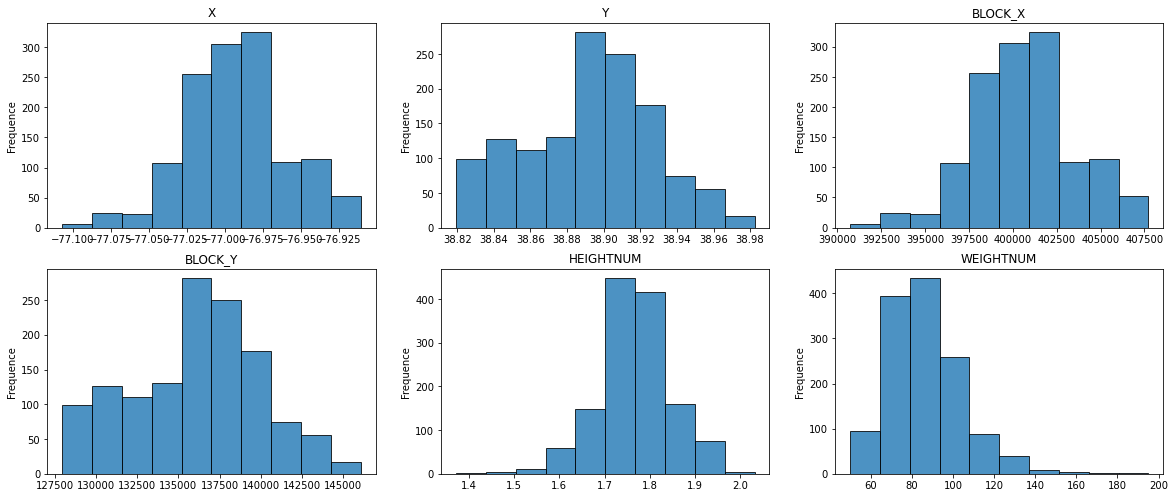

In [19]:
i = 1
plt.figure(figsize=(20,40))
for num_cols in numeric_cols:
    ax = plt.subplot(9,3,i)
    data[num_cols].plot.hist(edgecolor ='black', alpha = 0.8, ax = ax)
    ax.set_title(num_cols)
    ax.set_xlabel('')
    ax.set_ylabel('Frequence')
    i+=1
plt.show()

Histogram của các cặp (`X`, `BLOCK_X`), (`Y`, `BLOCK_Y`) có hình dạng rất giống nhau $=>$ Cùng xem mối quan hệ tương đồng giữa hai cặp thuộc tính này.

### Quan sát các cặp dữ liệu tương đồng.
Trong dữ liệu có hai cặp thuộc tính có ý nghĩa rất tương đồng nhau( `X` và `BLOCK_X`, `Y` và `BLOCK_Y`). Cùng xem xét hai cặp thuộc tính này.

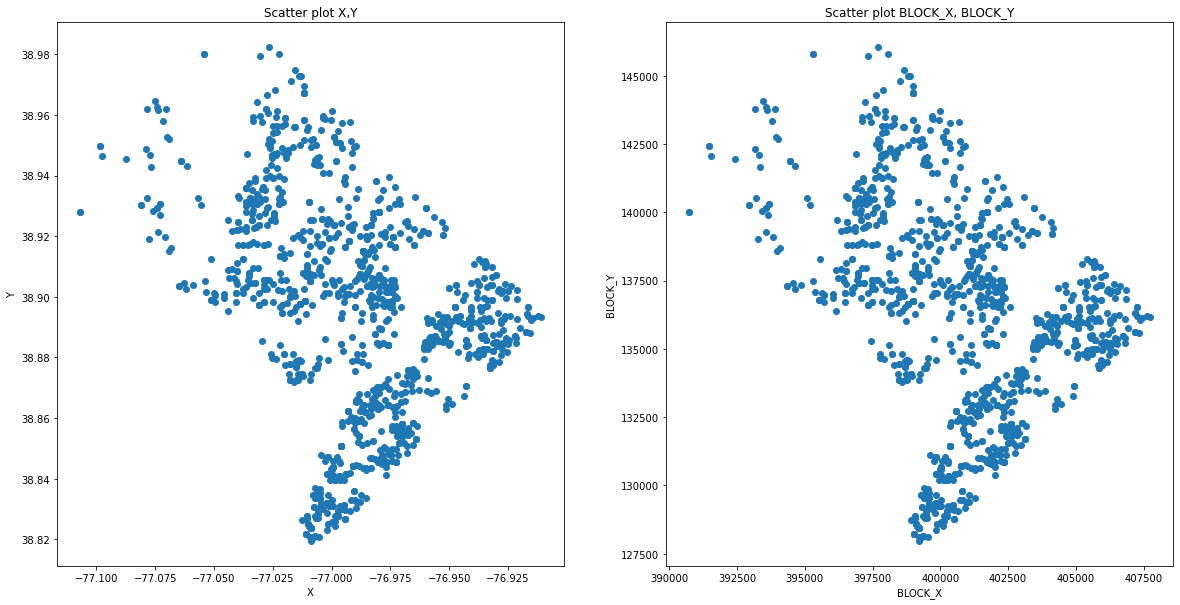

In [20]:
f, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].scatter(data.X, data.Y, )
ax[0].set_title('Scatter plot X,Y')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(data.BLOCK_X, data.BLOCK_Y)
ax[1].set_title('Scatter plot BLOCK_X, BLOCK_Y')
ax[1].set_xlabel('BLOCK_X')
ax[1].set_ylabel('BLOCK_Y')
plt.show()

- Tuy hai cặp thuộc tính này có giá trị khác nhau, nhưng khi dùng biểu đồ phân tán thì các điểm giá trị phân bổ rất tương đồng. Có thể suy ra rằng cặp thuộc tính (`BLOCK_X`,`BLOCK_Y`) đã được chuẩn hóa từ cặp (`X`,`Y`).

$=>$ Có thể loại bỏ 1 trong 2 cặp thuộc tính này.
- Nhìn vào giá trị và ý nghĩa, sẽ bỏ cặp thuộc tính (`BLOCK_X`,`BLOCK_Y`) vì cặp thuộc tính (`X`,`Y`) chính là cặp tọa độ của các địa điểm xảy ra hành vi phạm tội.

### Quan sát Washington DC trên bản đồ để dễ hình dung.

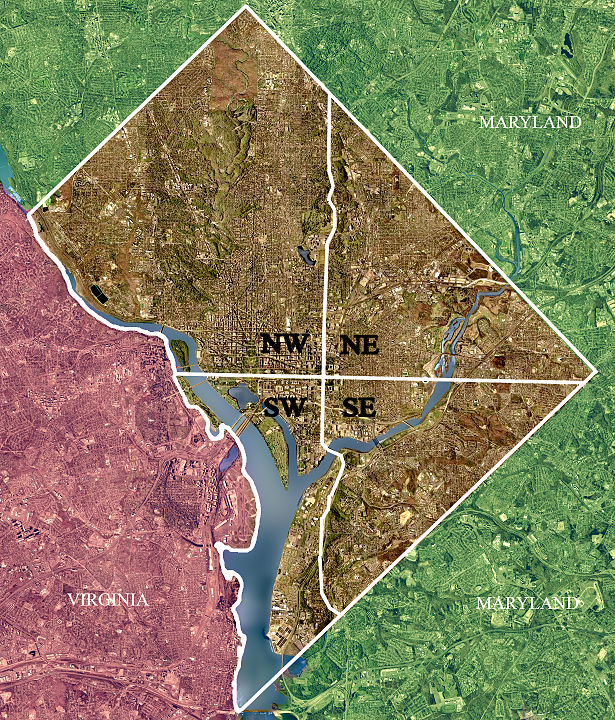

[Nguồn ảnh](https://www.wikiwand.com/vi/Washington,_D.C.)

Nhìn vào bản đồ và biểu đồ phân tán ở trên, ta có thể dùng biểu đồ phân tán để thay thế cho bản đồ để dễ dàng biểu diễn dữ liệu hơn.

### Các thuộc tính categorical

In [21]:
cate_cols = ['SEXOFFENDERCODE', 'LASTNAME', 'FIRSTNAME', 'ALIASES','MAXCLASSIFICATION',
             'EYECOLOR', 'HAIRCOLOR','MARKINGS', 'TYPE', 'BLOCKNAME', 'QUADRANT',
             'OBJECTID','ZIP', 'DISTRICT','PSA']
len(cate_cols), cate_cols

(15,
 ['SEXOFFENDERCODE',
  'LASTNAME',
  'FIRSTNAME',
  'ALIASES',
  'MAXCLASSIFICATION',
  'EYECOLOR',
  'HAIRCOLOR',
  'MARKINGS',
  'TYPE',
  'BLOCKNAME',
  'QUADRANT',
  'OBJECTID',
  'ZIP',
  'DISTRICT',
  'PSA'])

In [22]:
data[cate_cols].agg([diff_vals, num_diff_vals, missing_ratio]).transpose()

,diff_vals,num_diff_vals,missing_ratio
SEXOFFENDERCODE,"[002-910, 002-913, 002-919, 002-927, 002-928, ...",1059,0.0
LASTNAME,"[SANDERS, GAYLES, HARRIS, STRICKLAND, GANT, ME...",703,0.0
FIRSTNAME,"[ANTHONY, JERMAINE, REGINALD, GARY, TIMOTHY, D...",455,0.0
ALIASES,[DERRICK JUICE / X JUICE / ANTHONY SANDERS ...,630,40.513983
MAXCLASSIFICATION,"[A, B]",2,0.0
EYECOLOR,"[BROWN, BLUE, HAZEL, GRAY, BLACK, GREEN, MULTI...",8,0.0
HAIRCOLOR,"[BLACK, BROWN, BALD, BLACK/GRAY, RED, BLONDE, ...",11,0.0
MARKINGS,[TATTOO-LEFT WRIST: CHINESE SYMBOL; RIGHT WRIS...,325,69.160998
TYPE,"[HOME, WORK, SCHOOL]",3,0.0
BLOCKNAME,"[2300 - 2399 BLOCK OF GOOD HOPE ROAD SE, 2300 ...",887,0.0


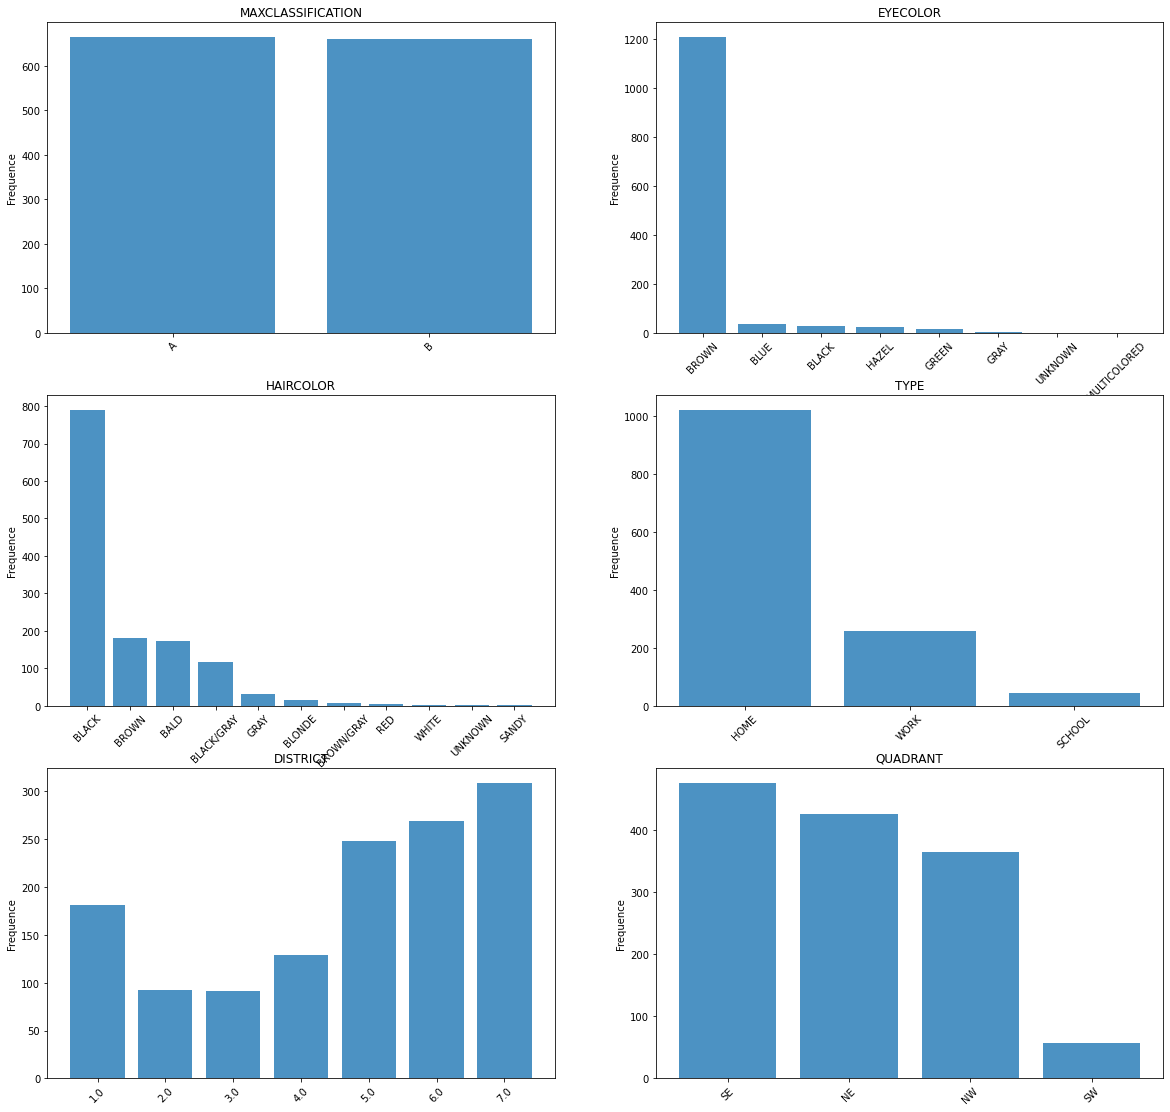

In [23]:
# Quan sát một vài thuộc tính.
some_cate_cols = ['MAXCLASSIFICATION','EYECOLOR','HAIRCOLOR','TYPE','DISTRICT','QUADRANT']

i = 1
plt.figure(figsize=(20,40))

for cate_col in some_cate_cols:
    ax = plt.subplot(6,2,i)
    val = data[cate_col].value_counts()
    labels = val.index
    ax.bar(labels,val, alpha = 0.8)
    ax.set_title(cate_col)
    ax.set_xlabel('')
    ax.set_ylabel('Frequence')
    ax.set_xticks(labels)
    ax.set_xticklabels(labels, rotation = 45)
    i+=1
plt.show()

- Đối với hai thuộc tính `ALIASES`( Biệt danh) và `MARKINGS`( Đặc điểm nhận dạng bên ngoài). Cùng xem thuộc tính `MARKINGS`

In [24]:
markings = data[~data['MARKINGS'].isna()]['MARKINGS']
len(markings), markings

(408,
 0       TATTOO-LEFT WRIST: CHINESE SYMBOL; RIGHT WRIST...
 2       TATTOO ON LOWER RIGHT ARM "LAMONT"; TATTOO ON ...
 3       TATTOO ON SHOULDER "TINA"; GUNSHOT WOUNDS ON B...
 4       TATTOO ON LEFT SHOULDER 'PICTURE OF A CROSS WI...
 5       TATTOO ON LEFT SHOULDER 'PICTURE OF A CROSS WI...
                               ...                        
 1255    TATTOO LEFT ARM CROSS & HEART - RIGHT ARM REBE...
 1272    TATTOO - TEAR DROP BELOW LEFT AND RIGHT EYE; H...
 1299    TATTOO ON UPPER RIGHT ARM" TUNE WITHIN A OPEN ...
 1300    TATTOO ON UPPER RIGHT ARM" TUNE WITHIN A OPEN ...
 1302    TATTOO ON LEFT HAND "PICTURE OF ROSE WITH WORD...
 Name: MARKINGS, Length: 408, dtype: object)

Có thể nhận ra, những người có `TATTOO` xuất hiện rất nhiều trong thuộc tính này( dấu hiệu nhận biết). Tính tỉ lệ này.

In [25]:
(np.sum(markings.apply(lambda x: 'TATTOO' in x)) / n_rows)*100

25.396825396825395

- Đến hơn <b>25%</b> số người vi phạm có dấu hiệu nhận biết là có hình xăm `TATTOO` trên người.
- Và gần <b>70%</b> số người vi phạm không có đặc điểm nhận dạng rõ ràng.

## Đặt câu hỏi:

### Câu hỏi 1: Đặc điểm nhận dạng chung của các tội phạm

Ta sẽ thêm cột BMI được tính theo công thức $BMI=\frac{WEIGHTNUM}{HEIGHTNUM^{2}}$ và phân loại cấp độ
- Gầy < 18.5
- Bình thường 18.5 - 25
- Thừa cân 25 - 30
- Béo phì >=30

In [26]:
data['BMI']=(data['WEIGHTNUM']/(data['HEIGHTNUM']**2)).astype('float')
for idx in data['BMI'].index:
    bmi=float(data['BMI'][idx])
    if bmi < 18.5:
        data.loc[idx,'BMI'] = 'Gầy'
    elif bmi < 25:
        data.loc[idx,'BMI'] = 'Bình thường'
    elif bmi < 30:
        data.loc[idx,'BMI'] ='Thừa cân'
    else:
        data.loc[idx,'BMI'] = 'Béo phì'

Tính số giá trị và phần trăm xuất hiện của các giá trị trong các cột 'EYECOLOR', 'HAIRCOLOR' , 'BMI', và đặc điểm nhận dạng `MARKINGS`. Đối với thuộc tính `MARKINGS` sẽ trích xuất hai giá trị là (`TATTOO`, `NO TATTOO`).

In [27]:
def istattoo(x):
    if x is np.nan:
        return 'NO TATTOO'
    else:
        return 'TATTOO' if 'TATTOO' in x else 'NO TATTOO'
    
data['MARKINGS'] = data['MARKINGS'].apply(istattoo)

In [28]:
def value_ratios(col):
    return dict(((col.value_counts()/len(col))*100).round(1))

pd.set_option('display.max_colwidth', 300) # Để dễ nhìn
cate_col_df=data[['EYECOLOR','HAIRCOLOR','BMI','MARKINGS']].copy()
cate_col_df = cate_col_df.agg([num_diff_vals, value_ratios])
cate_col_df

,EYECOLOR,HAIRCOLOR,BMI,MARKINGS
num_diff_vals,8,11,4,2
value_ratios,"{'BROWN': 91.3, 'BLUE': 2.9, 'BLACK': 2.2, 'HAZEL': 2.0, 'GREEN': 1.2, 'GRAY': 0.3, 'UNKNOWN': 0.1, 'MULTICOLORED': 0.1}","{'BLACK': 59.7, 'BROWN': 13.8, 'BALD': 13.1, 'BLACK/GRAY': 8.9, 'GRAY': 2.3, 'BLONDE': 1.1, 'BROWN/GRAY': 0.6, 'RED': 0.3, 'WHITE': 0.2, 'UNKNOWN': 0.1, 'SANDY': 0.1}","{'Thừa cân': 42.3, 'Bình thường': 31.2, 'Béo phì': 26.2, 'Gầy': 0.3}","{'NO TATTOO': 74.6, 'TATTOO': 25.4}"


Màu mắt(BROWN), màu tóc(BLACK) chiếm tỉ lệ rất cao. Tại vì đây là các tính trạng rất phổ biến. Chiếm tỉ lệ cao như vậy là rất bình thường. Đối với BMI người thừa cân chiếm hơn 40%, tỉ lệ này có thể coi là rất cao. Từ đó có thể kết luận rằng, những người thừa cân có xu hướng vi phạm nhiều hơn so với các đối tượng khác.

### Câu hỏi 2: Mức độ phạm tội của các tội phạm theo từng vị trí địa chỉ

In [29]:
class_type_df=data[['MAXCLASSIFICATION','TYPE']].copy()
class_type_df = class_type_df.agg([num_diff_vals, value_ratios])
class_type_df

,MAXCLASSIFICATION,TYPE
num_diff_vals,2,3
value_ratios,"{'A': 50.2, 'B': 49.8}","{'HOME': 77.1, 'WORK': 19.5, 'SCHOOL': 3.4}"


In [30]:
arr_class=data['MAXCLASSIFICATION'].unique()
arr_type=data['TYPE'].unique()
class_type_ratio_df=pd.DataFrame()
for i in arr_class:
    class_df=data[data['MAXCLASSIFICATION']==i]
    list_ratios=[]
    for j in arr_type:
        ratios=((class_df['TYPE']==j).mean()*100).round(1)
        list_ratios.append(ratios)
    class_type_ratio_df[i]=list_ratios
class_type_ratio_df=(((class_type_ratio_df.set_index(arr_type)).sort_values(by=['A'],ascending=False)).T).sort_values(by=['HOME'],ascending=False)
class_type_ratio_df

,HOME,WORK,SCHOOL
A,81.5,15.2,3.3
B,72.7,23.8,3.5


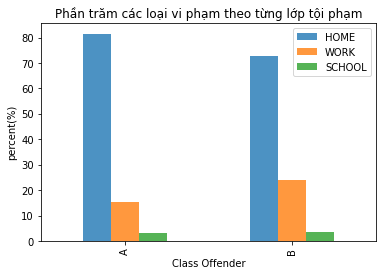

In [31]:
class_type_ratio_df.plot.bar(alpha = 0.8)
plt.ylabel('percent(%)')
plt.xlabel('Class Offender')
plt.title('Phần trăm các loại vi phạm theo từng lớp tội phạm')
plt.show()

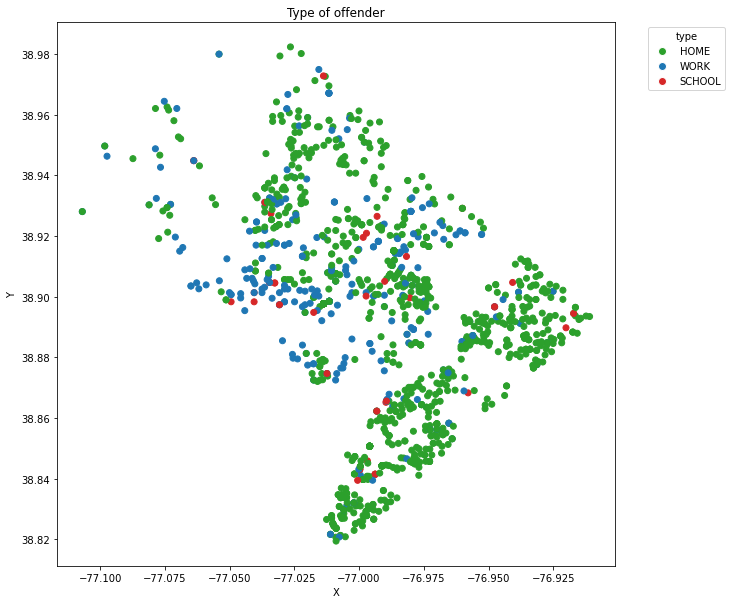

In [32]:
# Cùng quan sát phân bố của các loại tội phạm.
from matplotlib.lines import Line2D

plt.figure(figsize = (10,10))
colors ={'HOME':'tab:green','WORK':'tab:blue','SCHOOL':'tab:red'}
plt.scatter(data.X, data.Y, c = data.TYPE.map(colors))
plt.title('Type of offender')
plt.xlabel('X')
plt.ylabel('Y')
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title='type', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Tỉ lệ xâm phạm ở nhà(HOME) cao hơn rất nhiều so với ở công ty(WORK) và trường học(SCHOOL).

### Câu hỏi 3: Xếp hạng các `PSA` an toàn nhất ở Washington DC theo mỗi `DISTRICT`.

Đầu tiên, tìm hiểu về `PSA`(public safety announcement Number). Có bảy khu cảnh sát ở Washington DC. Có tổng cộng 57 PSA ở Đặc khu Columbia. Mỗi khu vực cảnh sát có từ bảy đến chín PSA. Có thể tìm thấy ở [đây](https://mpdc.dc.gov/page/police-districts-and-police-service-areas?fbclid=IwAR21cobshhzw8I9D97rpudVdL_JU-0kIuXZxmEJB9idwhzWjXd_6r4GN_8A)

In [33]:
data['PSA'].value_counts().count()

57

Trước khi làm cần tìm hiểu về biểu đồ các PSA ở Washington DC.

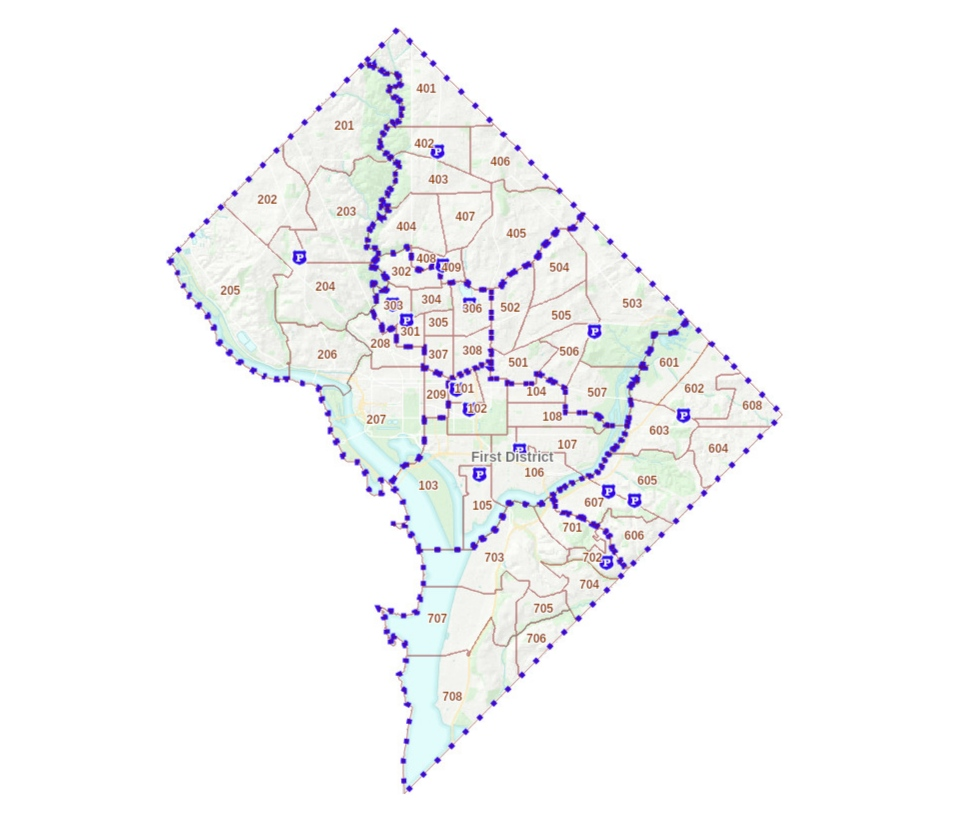


Đường bao chấm xanh phân cách cho mỗi `DISTRICT`(Quận). Trong mỗi quận được chia thành các khu vực cảnh sát PSA.
Do đó có thể nhận ra PSA sẽ có chỉ số hàng trăm là tên Quận mà nó trực thuộc.

Ảnh được cắt từ [Nguồn ảnh](https://dcgis.maps.arcgis.com/apps/InformationLookup/index.html?appid=9b33920cad0a4c0796e4567100c72fef&fbclid=IwAR0ZI6sxpIR3icQl1GP8Gy_5DdNQ0H9sgNUVD_WLkIelTBwtnytvyMmhE4U)

#### Tính tỉ lệ.

Như đã phân tích ở trên, thuộc tính `DISTRICT` và `PSA` có chứa các dữ liệu thiếu. Do đó cần xóa các dòng có chứa các giá trị nan ở hai thuộc tính này. Để tránh ảnh hưởng đến các câu hỏi sau, ta sẽ tạo một DataFrame `question3_df` mới có hai cột là `DISTRICT` và `PSA` được copy từ data.

In [34]:
question3_df = data[['DISTRICT','PSA']]
question3_df = question3_df.dropna()
question3_df.isna().sum()

DISTRICT    0
PSA         0
dtype: int64

In [35]:
# Tính số lượng vụ xâm phạm cho từng PSA ở mỗi Quận.
df_psa = question3_df.groupby(['DISTRICT'])['PSA'].value_counts().unstack()
df_psa

PSA,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,201.0,202.0,203.0,204.0,205.0,206.0,207.0,208.0,209.0,301.0,302.0,303.0,304.0,305.0,306.0,307.0,308.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,501.0,502.0,503.0,504.0,505.0,506.0,507.0,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,701.0,702.0,703.0,704.0,705.0,706.0,707.0,708.0
DISTRICT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,13.0,79.0,11.0,13.0,18.0,16.0,21.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,6.0,6.0,13.0,4.0,7.0,26.0,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,24.0,9.0,15.0,3.0,8.0,6.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,9.0,14.0,13.0,30.0,19.0,21.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,32.0,33.0,24.0,28.0,65.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,47.0,67.0,54.0,22.0,11.0,31.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,25.0,64.0,34.0,26.0,34.0,33.0,54.0


Kiểm tra xem có PSA nào lạc loài hay không?

In [36]:
fail_psa = df_psa.apply(lambda x: sum(~x.isna()) > 1)
df_psa[fail_psa.index[fail_psa]]

PSA,703.0
DISTRICT,
1.0,NaN
2.0,NaN
3.0,NaN
4.0,NaN
5.0,1.0
6.0,NaN
7.0,64.0


Do chưa biết nguyên nhân tại sao lại có giá trị này nên tạm thời cho giá trị của các giá trị này là `NaN` để tránh ảnh hưởng đến câu trả lời.

In [37]:
df_psa[703][5] = np.nan

Tiếp theo là tính tỉ lệ cho từng PSA và rút ra các PSA có tỉ lệ thấp nhất và cao nhất theo từng Quận.

In [38]:
def my_argmin(s):
    return s.index[np.argmin(s)]
def my_argmax(s):
    return s.index[np.argmax(s)]

psa_ratio = df_psa/np.array([df_psa.sum(axis = 1).values]).T *100

psa_ratio_perDist = pd.DataFrame(psa_ratio.T.apply(lambda x: dict(x.dropna().round(2).sort_values())),
                                 columns=['psa ratio'])

psa_in_District = psa_ratio.T.agg([my_argmin, my_argmax]).T
psa_in_District = pd.concat([psa_in_District, psa_ratio_perDist], axis = 1)
psa_in_District.rename(columns={'my_argmin': 'SafePSA',
                                'my_argmax': 'DangerousPSA'}, inplace= True)
psa_in_District

,SafePSA,DangerousPSA,psa ratio
1.0,108.0,102.0,"{108.0: 5.52, 103.0: 6.08, 101.0: 7.18, 104.0: 7.18, 106.0: 8.84, 105.0: 9.94, 107.0: 11.6, 102.0: 43.65}"
2.0,205.0,207.0,"{205.0: 4.35, 202.0: 6.52, 203.0: 6.52, 206.0: 7.61, 201.0: 8.7, 209.0: 10.87, 208.0: 13.04, 204.0: 14.13, 207.0: 28.26}"
3.0,305.0,302.0,"{305.0: 3.3, 307.0: 6.59, 301.0: 8.79, 306.0: 8.79, 303.0: 9.89, 304.0: 16.48, 308.0: 19.78, 302.0: 26.37}"
4.0,401.0,405.0,"{401.0: 5.47, 409.0: 5.47, 408.0: 6.25, 402.0: 7.03, 404.0: 10.16, 403.0: 10.94, 406.0: 14.84, 407.0: 16.41, 405.0: 23.44}"
5.0,501.0,506.0,"{501.0: 6.88, 504.0: 9.72, 505.0: 11.34, 502.0: 12.96, 503.0: 13.36, 507.0: 19.43, 506.0: 26.32}"
6.0,601.0,603.0,"{601.0: 3.35, 606.0: 4.09, 605.0: 8.18, 608.0: 10.41, 607.0: 11.52, 602.0: 17.47, 604.0: 20.07, 603.0: 24.91}"
7.0,702.0,703.0,"{702.0: 8.09, 705.0: 8.41, 707.0: 10.68, 704.0: 11.0, 706.0: 11.0, 701.0: 12.62, 708.0: 17.48, 703.0: 20.71}"


#### Biểu đồ: Tỉ lệ theo từng quận.

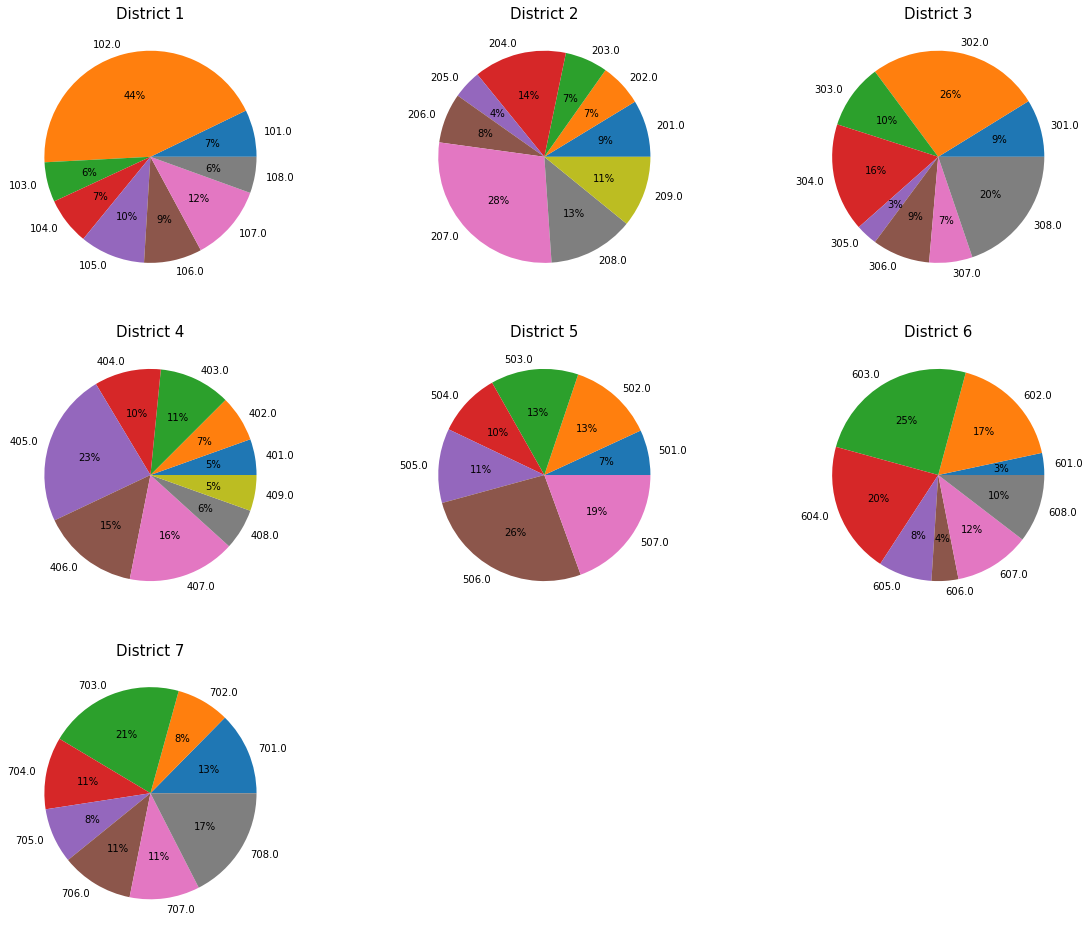

In [39]:
plt.figure(figsize=(20,40))
for i in range(len(psa_ratio)):
    ax = plt.subplot(len(psa_ratio), 3, i+1)
    psa_ratio.iloc[i].dropna().plot.pie(autopct='%1.f%%', ax=ax)
    ax.set_ylabel('')
    ax.set_title('District {}'.format(i+1), size = 15)
plt.show()

**Nhận xét:** Nhìn chung 7 quận đều có sự chênh giữa safePSA và DangerousPSA. Quận 1, 2, 3 có sự chênh lệch rất nhiều. Từ đây có thể rút ra một vài PSA an toàn để sống cho các hộ gia đình mới chuyển đến Washington DC, giảm thiểu nguy cơ con cái cũng như người thân bị xâm phạm. Tiêu biểu như là PSA: 103, 108 ở quận 1, 205 ở quận 2, 305 ở quận 3 ...

### Câu 4: Số lượng tội phạm đã đăng kí và loại vi phạm thay đổi như thế nào?

#### Số lượng đăng kí qua từng năm.

In [40]:
# Thêm cột Year thể hiện năm đăng kí.
data['Year Register'] = data['REGISTRATIONDATE'].apply(lambda x:x.year)
register_counts = data['Year Register'].value_counts().sort_index()
register_counts

1999      2
2000     52
2001     46
2002     54
2003     37
2004     38
2005     29
2006     31
2007     32
2008     38
2009     57
2010     68
2011     81
2012     77
2013     85
2014     69
2015     59
2016    124
2017     92
2018     93
2019     94
2020     65
Name: Year Register, dtype: int64

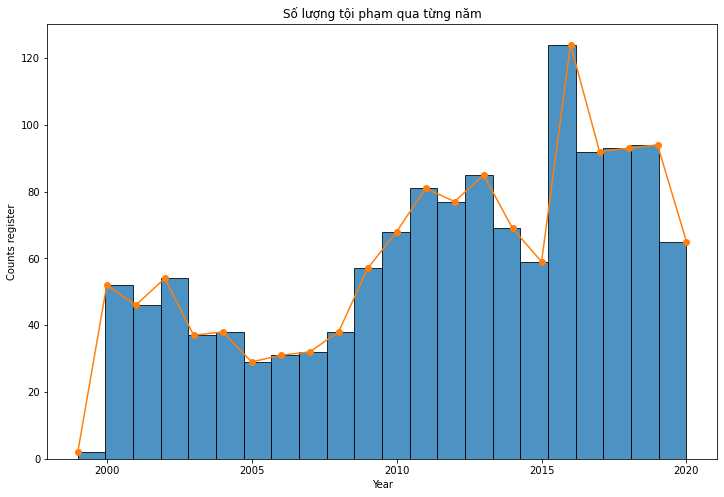

In [41]:
fig, ax=plt.subplots(figsize=(12,8))

data['Year Register'].plot(kind='hist',edgecolor='black', alpha = 0.8,bins=22)
register_counts.plot.line(marker = 'o')
plt.title('Số lượng tội phạm qua từng năm')
plt.xlabel('Year')
plt.ylabel('Counts register')
plt.show()


Trong giai đoạn 1999-2020, tỷ lệ tội phạm đăng kí có tăng, có giảm. Nhưng trong giai đoạn 2016-2020 đang có xu hướng giảm dần.

### Câu hỏi 5: Các lớp tội phạm( A, B) thay đổi như thế nào qua từng năm?

In [42]:
ClassOf_Ofennder = data.groupby(['MAXCLASSIFICATION'])['Year Register'].value_counts().unstack()

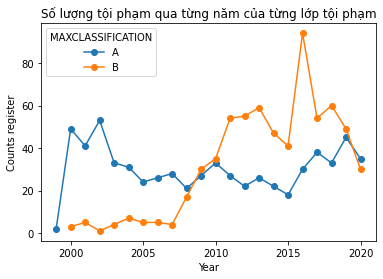

In [43]:
ClassOf_Ofennder.T.plot.line(marker = 'o')
plt.title('Số lượng tội phạm qua từng năm của từng lớp tội phạm')
plt.xlabel('Year')
plt.ylabel('Counts register')
plt.show()

Class A có xu hướng tăng, nhưng không nhiều ít biến động: Class A chỉ những tội phạm tình dục hoặc đối với trẻ vị thành niên dưới 12 tuổi.
Class B có xu hướng tăng, đỉnh điểm là năm 2016, nhưng đã giảm dần ở 4-5 năm gần đây (2016-2020).

Ngày đăng kí ( Register date) có thể hiểu là một người khí vi phạm một hành vi xâm hại tình dục và có thể bị kết tội hoặc không bị kết tội do điên rồ( có vấn đề thần kinh), khi đó họ phải đăng kí hành vi phạm tội. Từ đó các cơ quan cảnh sát địa phương có thể kiểm sát.Như vậy, phân bố độ tuổi của tội phạm đăng kí như thế nào?

### Câu hỏi 6: Phân bố độ tuổi đăng kí phạm tội.

In [44]:
# Thêm cột AGE là độ tuổi đăng kí.
age = data['REGISTRATIONDATE'] - data['BIRTHDATE']
data['AGE'] = round(age.dt.days/365.2425)

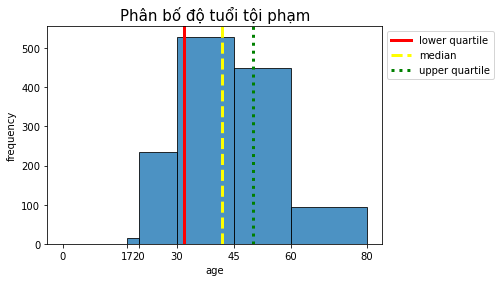

In [45]:
hist = plt.hist(data['AGE'], edgecolor ='black',bins = [0,17,20,30,45,60,80],alpha = 0.8)

plt.title('Phân bố độ tuổi tội phạm', size = 15)
plt.xlabel('age')
plt.ylabel('frequency')
plt.xticks(hist[1])

# Tính tứ phân vị (quantiles) của age
## Lower quartile
lower_quartile = data['AGE'].quantile(0.25)
plt.axvline(lower_quartile, 
            color='red', linestyle='solid', linewidth=3, 
            label='lower quartile')

## median
median = data['AGE'].quantile(0.5)
plt.axvline(median, 
            color='yellow', linestyle='dashed', linewidth=3,
            label='median')

## upper quartile
upper_quartile = data['AGE'].quantile(0.75)
plt.axvline(upper_quartile, 
            color='green', linestyle='dotted', linewidth=3,
            label='upper quartile')

plt.legend(loc ='best', bbox_to_anchor = (1,1))
plt.show()

Độ tuổi phạm tội chủ yếu là trung niên. Nhưng tập trung nhiều hơn ở độ tuổi(Middle-aged Adults), tuy nhiên độ tuổi(Old-aged Adults) cũng chiếm số lượng rất cao. Cũng dễ hiểu, ở độ tuổi này là độ tuổi khủng hoảng về tiền bạc cũng như tinh thần. Bên cạnh đó, nhu cầu của độ tuổi này cũng rất cao, nên sẽ có những hành vi không thể kiểm soát.

#### Hành vi phạm tội ( WORK, HOME, SCHOOL) có độ tuổi như thế nào?

In [46]:
type_of_Offender_by_Age = data.groupby(['TYPE'])['AGE'].value_counts().unstack()
type_of_Offender_by_Age

AGE,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,74.0,75.0,76.0,77.0,79.0,81.0
TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
HOME,2.0,8.0,15.0,10.0,27.0,15.0,24.0,16.0,26.0,26.0,4.0,13.0,21.0,31.0,27.0,13.0,26.0,30.0,29.0,23.0,24.0,21.0,22.0,35.0,23.0,36.0,36.0,28.0,21.0,26.0,36.0,24.0,35.0,33.0,27.0,21.0,26.0,12.0,22.0,19.0,14.0,13.0,13.0,12.0,9.0,7.0,9.0,10.0,4.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
SCHOOL,NaN,3.0,NaN,NaN,NaN,NaN,5.0,2.0,NaN,1.0,NaN,2.0,2.0,3.0,2.0,1.0,2.0,1.0,5.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WORK,1.0,2.0,6.0,2.0,5.0,5.0,8.0,4.0,7.0,6.0,2.0,3.0,6.0,9.0,13.0,4.0,7.0,4.0,7.0,13.0,6.0,10.0,5.0,6.0,3.0,10.0,9.0,14.0,6.0,8.0,9.0,5.0,6.0,4.0,7.0,7.0,5.0,2.0,2.0,1.0,2.0,5.0,3.0,1.0,1.0,NaN,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


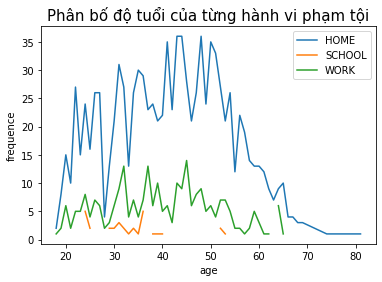

In [47]:
type_of_Offender_by_Age.T.plot.line()
plt.title('Phân bố độ tuổi của từng hành vi phạm tội', size = 15)
plt.xlabel('age')
plt.ylabel('frequence')
plt.legend()
plt.show()

**Nhận xét:** Phân bố tội phạm loại `SCHOOL`( tức là vi phạm ở trường) bị đức quãng ở nhiều chổ, chứng tỏ rằng độ tuổi vi phạm chỉ ở một số độ tuổi nhất đinh, do đó số luongj tội phạm cũng ít hơn. Mặc khác, đối với hai loại `HOME` và `SCHOOL` phân bố độ tuổi cũng như số lượng chiếm tỉ lệ rất cao.

## Nhìn lại quá trình làm đồ án:
1. Khó khăn:
    - Đầu tiên là git, chưa thành thạo trong quy trình tạo nhiều branch cũng như merge code với notebook.
    - Thứ hai là việc tìm dữ liệu, có quá nhiều đề tài để lựa chọn. Mất rất nhiều thời gian.
    - Thứ ba là vấn đề đặt câu hỏi, đây cũng là vấn đề chiếm nhiều thời lượng thứ hai sau việc chọn đề tài.
    - Cuối cùng là làm việc nhóm, làm việc từ xa rất khó trong việc trao đổi liền mạch.
2. Những kỹ năng học được:
    - Thành thạo hơn trong việc quản lý các phiên bản làm việc bằng git, github.
    - Khả năng phân tích dữ liệu, trích lọc các thuộc tính có ích.